# Interactive density profiles

Plot an arbitrary number of density profiles in R\[m\] and in $\rho$. Adjust the time instants interactively. The time instants are highlighted on top of a chosen signal from AFS.

This notebook runs in autopilot, meaning you can control everything by changing a few parameters. Look for the indication **<span style="color:blue">parameters</span>** to find them. Every cell contains a brief description at the top.

Refer to notebook 16A for averaged density profiles, and notebook 16B for ELM-free density profiles.

#### Import libraries

In [1]:
%matplotlib notebook
from ipfnpytools.getsig import getsig
import ipfnpytools.aug_read as aug_read
from ipfnpytools.closest import closest
from ipfnpytools.plot import plots
from warnings import warn
import numpy as np
from ipfnpytools.save_figure import save_figure
from ipfnpytools import rps_dump
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import ipywidgets as widgets
import reflectometry as rfl
from ipfnpytools.trz_to_rhop import trz_to_rhop

### <span style="color:blue">Parameters</span>

In [2]:
# Shot number
shot = 37765

# Choose edition for reflectometry (0 for most recent)
edition = 0

# Choose profile source between 'afs' and 'dump'
source = 'afs'

# Path to dump file 
path = None 

# Signal to overlay the density profiles
support_signal = ('FPG', 'delRoben')

# Choose edition for the supporting signal (0 for most recent)
support_signal_edition = 0

# Magnetic equillibrium
equillibrium = "EQH"

# Number of density profiles to show in the plots
number_of_profiles = 3

# Show HFS and LFS rho profiles on the same window
show_same = False

# Show wall on the rho plots
show_wall = True

# *** End of parameters ***

### Load support signal from AFS

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:118: RuntimeWarning: Warning by DDcsgnl (8.1): no calibration of data
  warnings.warn(err_txt, RuntimeWarning)


<IPython.core.display.Javascript object>


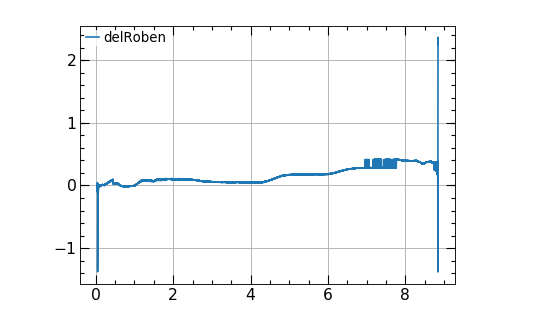

(<Figure size 535.433x330.916 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2b9ff8e8c150>)

In [3]:
signal = getsig(shot, support_signal[0], support_signal[1], edition=support_signal_edition)
plots(signal.time, signal.data, labels=signal.name)

### Fetch density profile data

In [4]:
time, lfs_signal, hfs_signal, lfs_area, hfs_area = rfl.fetch(shot, path if source=='dump' else None, verbose=False)

# Unit conversion
lfs_signal*=1e-19
hfs_signal*=1e-19

# Remove NaN's
lfs_area = np.nan_to_num(lfs_area)
hfs_area = np.nan_to_num(hfs_area)

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:118: RuntimeWarning: Warning by DDcsgrp (8.1): No PARAM_SET found
  warnings.warn(err_txt, RuntimeWarning)


### Plot density vs. R \[m\]

<IPython.core.display.Javascript object>


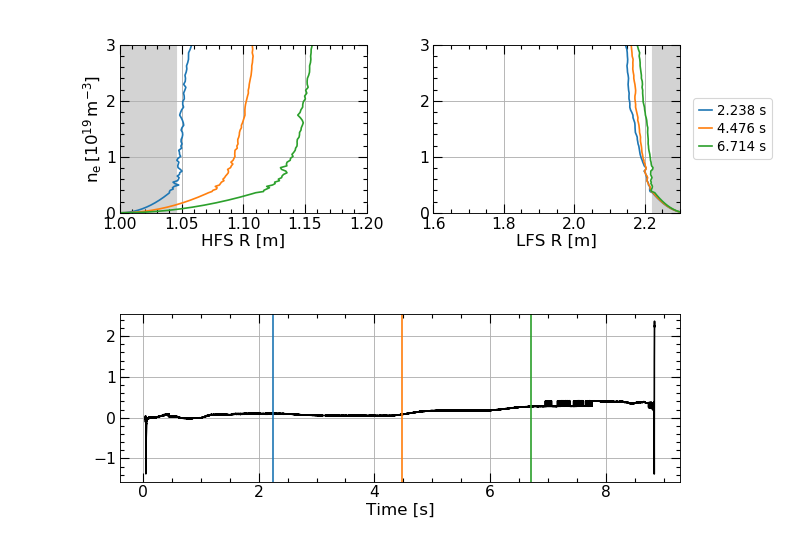

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTYuNzEzOTU3Nzg2NTYwMDU5LCBkZXNjcmlwdGlvbj11J1RpbWUgW3NdJywgbWF4PTguODQ0ODE5MDY4OTA4NjkxLCBtaW7igKY=


In [5]:
fig1, ax1, ax2, ax3 = rfl.two_plus_one(
    x1=signal.time, y1=signal.data, 
    x23=time, y2=hfs_area, y3=lfs_area, 
    z2=hfs_signal, z3=lfs_signal, 
    lx1="Time [s]", ly1='',
    ly2="HFS R [m]", lz2=r'$\mathrm{n_{e}\,[10^{19}\,m^{-3}]}$',
    ly3="LFS R [m]", lz3=r'$\mathrm{n_{e}\,[10^{19}\,m^{-3}]}$',
    number_of_profiles=number_of_profiles, 
    m2=None, m3=None, 
    strip_pts=1, show_same=False, 
    paint_rho=False, paint_wall=True,
    sharex=False, sharey=True,
)

## <span style="color:blue">Parameters</span>
Change the figure manualy with your cursor, or by running the following cell

In [6]:
fig1.set_size_inches(10, 7)  # Figure size in inches (widht, height)

ax1.set_xlim(None, None)  # Bottom plot x-range
ax1.set_ylim(None, None)  # Bottom plot y-range

ax2.set_xlim(1, 1.2)  # Top-left plot x-range
ax2.set_ylim(0, 3)  # Top-left plot y-range

ax3.set_xlim(1.6, 2.3) # Top-right plot x-range
ax3.set_ylim(0, 3)  # Top-right plot y-range

(0, 3)

### Save the figure to your working directory

In [7]:
save_figure(fig1, "timed_profiles")

Figure saved to /afs/ipp-garching.mpg.de/home/d/danielhfc/python/AUG/timed_profiles.png


### Convert R \[m\] to $\rho$

In [8]:
# Set the antenna Z
zl = 0.14
zh = 0.07

# Walls
inner_wall = 1.045
outer_wall = 2.22

inner_wall_rho = trz_to_rhop(time, inner_wall, zh, shot, eq=equillibrium)
outer_wall_rho = trz_to_rhop(time, outer_wall, zl, shot, eq=equillibrium)

rhol = trz_to_rhop(time, lfs_area, np.ones_like(lfs_area)*zl, shot, eq=equillibrium)
rhoh = trz_to_rhop(time, hfs_area, np.ones_like(hfs_area)*zh, shot, eq=equillibrium)

trz_to_rhop:17051/17051
trz_to_rhop:17051/17051
trz_to_rhop:17051/17051
trz_to_rhop:17051/17051


### Plot density vs. $\rho$

<IPython.core.display.Javascript object>


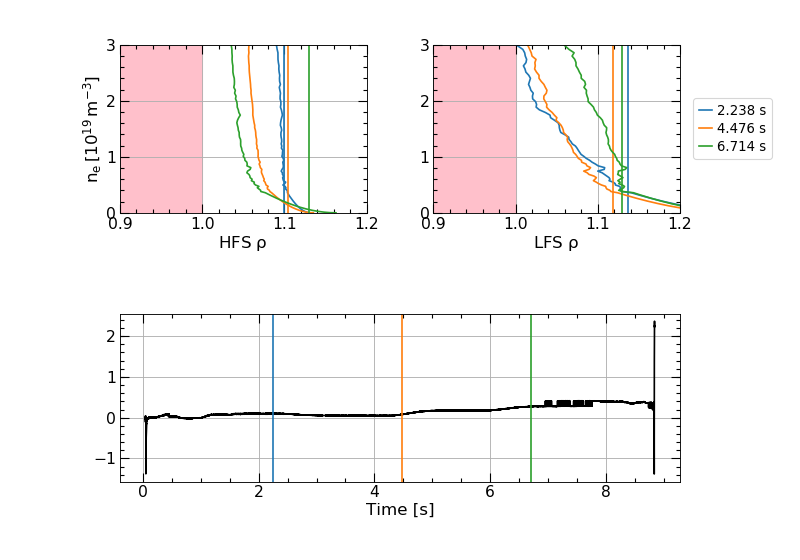

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTYuNzEzOTU3Nzg2NTYwMDU5LCBkZXNjcmlwdGlvbj11J1RpbWUgW3NdJywgbWF4PTguODQ0ODE5MDY4OTA4NjkxLCBtaW7igKY=


In [9]:
fig2, ax4, ax5, ax6 = rfl.two_plus_one(
    x1=signal.time, y1=signal.data, 
    x23=time, y2=rhoh, y3=rhol, 
    z2=hfs_signal, z3=lfs_signal, 
    lx1="Time [s]", ly1='',
    ly2=r"$\rho$" if show_same else r"HFS $\rho$",  
    lz2=r'$\mathrm{n_{e}\,[10^{19}\,m^{-3}]}$',
    ly3=r"LFS $\rho$", lz3=r'$\mathrm{n_{e}\,[10^{19}\,m^{-3}]}$',
    number_of_profiles=number_of_profiles, 
    m2=inner_wall_rho if show_wall else None, 
    m3=outer_wall_rho if show_wall else None, 
    strip_pts=1, show_same=show_same, 
    paint_rho=True, paint_wall=False,
    sharex=True, sharey=True,
)

## <span style="color:blue">Parameters</span>
Change the above figure manualy with your cursor, or by running the following cell

In [10]:
fig2.set_size_inches(10, 7)  # Figure size in inches (width, height)

ax4.set_xlim(None, None)  # Bottom plot x-range
ax4.set_ylim(None, None)  # Bottom plot y-range

ax5.set_xlim(0.9, 1.2)  # Top-left plot x-range
ax5.set_ylim(0, 3)  # Top-left plot y-range

ax6.set_xlim(0.9, 1.2) # Top-right plot x-range
ax6.set_ylim(0, 3)  # Top-right plot y-range

(0, 3)

### Save the figure to your working directory

In [11]:
save_figure(fig2, "three_plots_rho")

Figure saved to /afs/ipp-garching.mpg.de/home/d/danielhfc/python/AUG/three_plots_rho.png
